In [141]:
import torch
import torch.nn.functional as F
from pytorch_lightning import Trainer
from datamodules.mat_datamodules import MatDataModule
from models.lit_unet import LitUNet
from torchvision.transforms import Compose
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# import torchvision.transforms as transforms

In [62]:
# class MaxAbsScaler:
#     def __init__(self, max_abs_value):
#         self.max_abs_value = max_abs_value
#     def __call__(self, tensor):
#         return tensor / self.max_abs_value

In [142]:
# max_abs_value_input = 1.2040270566940308
# max_abs_value_tgt = 0.7881543636322021

# max_abs_scaler_input = MaxAbsScaler(max_abs_value=max_abs_value_input)
# max_abs_scaler_tgt = MaxAbsScaler(max_abs_value=max_abs_value_tgt)

train_transform_input = Compose([
        # max_abs_scaler_input,
    ])

train_transform_tgt = Compose([
        # max_abs_scaler_tgt,
    ])

val_test_transform_input = Compose([
        # max_abs_scaler_input,
    ])

val_test_transform_tgt = Compose([
        # max_abs_scaler_tgt,
    ])


In [144]:
datamodule = MatDataModule(
        data_dir='data',
        train_transform=None,
        val_test_transform=None,
        batch_size=32,
        num_workers=4,
        seed=42
    )


In [146]:
best_model_path = "checkpoints/UnetPlusPlus/best-checkpoint-epoch=18-val_loss=0.0005.ckpt"

model = LitUNet(loss_fn=F.mse_loss, learning_rate=1e-4)

checkpoint = torch.load(best_model_path, map_location=torch.device('cuda'))
model.load_state_dict(checkpoint['state_dict'])

trainer = Trainer()
trainer.test(model=model, datamodule=datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\FlowImgWS\miniconda3\envs\Nanako3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:420: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 63/63 [03:52<00:00,  0.27it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss          0.0008851992897689342
         test_r2            0.8238790035247803
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.0008851992897689342, 'test_r2': 0.8238790035247803}]

In [149]:
test_gt_list = model.test_gt
#prediction
test_outputs_list = model.test_outputs

In [150]:
test_gt = np.array(torch.cat(test_gt_list, dim=0).cpu())
test_outputs = np.array(torch.cat(test_outputs_list, dim=0).cpu())

C:\Users\FlowImgWS\AppData\Local\Temp\ipykernel_19056\1553524760.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_gt = np.array(torch.cat(test_gt_list, dim=0).cpu())
C:\Users\FlowImgWS\AppData\Local\Temp\ipykernel_19056\1553524760.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_outputs = np.array(torch.cat(test_outputs_list, dim=0).cpu())


In [151]:
test_dataset = datamodule.test_dataset
test_inputs = np.array(test_dataset)[:, 0, ...]

In [152]:
np.array_equal(test_gt, test_inputs)

False

In [153]:
np.std(test_gt.flatten())

np.float32(0.07536421)

In [154]:
test_gt.shape, test_outputs.shape, test_inputs.shape

((2000, 1, 256, 256), (2000, 1, 256, 256), (2000, 1, 256, 256))

In [155]:
save_path_gt = 'images/test_gt.npy'
save_path_inputs = 'images/test_inputs.npy'
save_path_outputs = 'images/test_outputs.npy'


np.save(save_path_gt, test_gt)
np.save(save_path_inputs, test_inputs)
np.save(save_path_outputs, test_outputs)


In [71]:
gt_flatten = []
for batch in test_gt:
    # batch は NumPy配列
    gt_flatten.extend(batch.flatten())


In [ ]:
# pred_flatten = []
# for batch in test_outputs:
#     pred_flatten.extend(batch.detach().cpu().numpy().flatten())

In [72]:
pred_flatten = []
for batch in test_outputs:
    # batch は NumPy配列
    pred_flatten.extend(batch.flatten())

In [74]:
gt_flatten = np.array(gt_flatten)
pred_flatten = np.array(pred_flatten)

In [75]:
np.sum(gt_flatten)
gt_flatten

array([0., 0., 0., ..., 0., 0., 0.], shape=(131072000,), dtype=float32)

In [77]:
pred_flatten[gt_flatten==0]

array([-0.0204196 , -0.00651934, -0.00280465, ..., -0.0015562 ,
       -0.00464149, -0.01782446], shape=(104818136,), dtype=float32)

In [ ]:
plt.scatter(gt_flatten[gt_flatten==0], pred_flatten[gt_flatten==0], alpha=0.1)
# r2_score(gt_flatten[gt_flatten==0], pred_flatten[gt_flatten==0])

0.0

In [128]:
i = 250
sample_gt = test_gt[i]
sample_pred = test_outputs[i]

In [129]:
sample_gt = sample_gt.flatten()
sample_pred = sample_pred.flatten()


(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, -0.8, '−0.8'),
  Text(0, -0.6000000000000001, '−0.6'),
  Text(0, -0.4, '−0.4'),
  Text(0, -0.19999999999999996, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.19999999999999996, '0.2'),
  Text(0, 0.40000000000000013, '0.4'),
  Text(0, 0.6000000000000001, '0.6')])

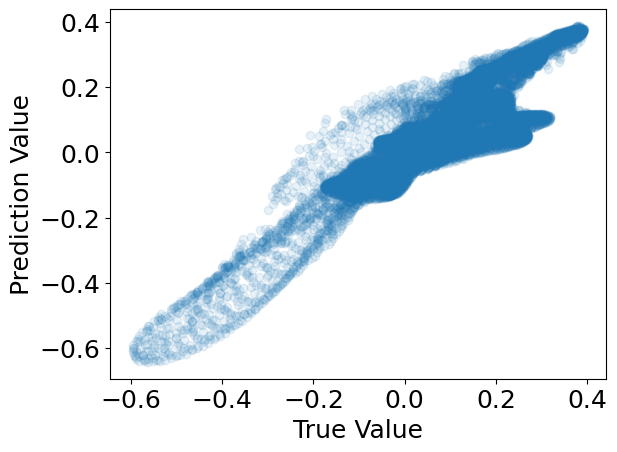

In [138]:
plt.scatter(sample_gt, sample_pred, alpha=0.1)
plt.ylabel('Prediction Value', fontsize=18)
plt.xlabel('True Value', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# r2_score(gt_flatten[gt_flatten!=0], pred_flatten[gt_flatten!=0])

In [80]:
test_outputs[0].shape

(1, 256, 256)

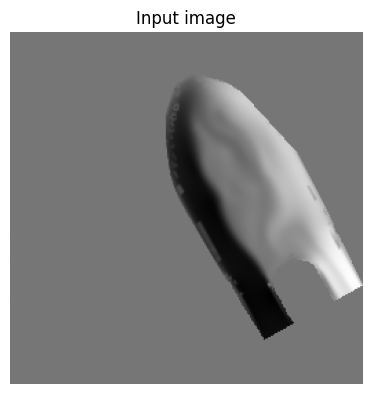

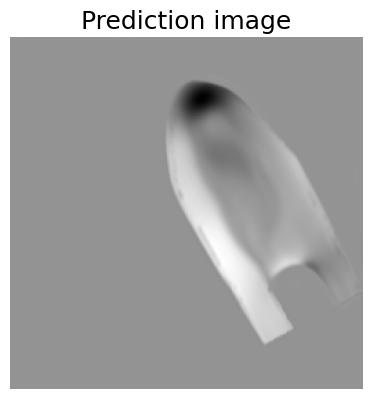

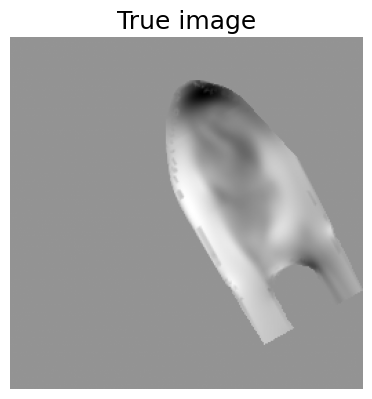

In [139]:
batch_idx = 2  # 何番目のバッチ

# test_outputs[batch_idx][0] → 形状 (256, 256)
input_img = test_inputs[batch_idx][0]
pred_img = test_outputs[batch_idx][0]  # これで (256, 256)
outputs_img = test_gt[batch_idx][0]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(input_img, cmap="gray")
plt.title("Input image")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(pred_img, cmap="gray")
plt.title("Prediction image",fontsize=18)
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.imshow(outputs_img, cmap="gray")
plt.title("True image",fontsize=18)
plt.axis("off")
plt.show()


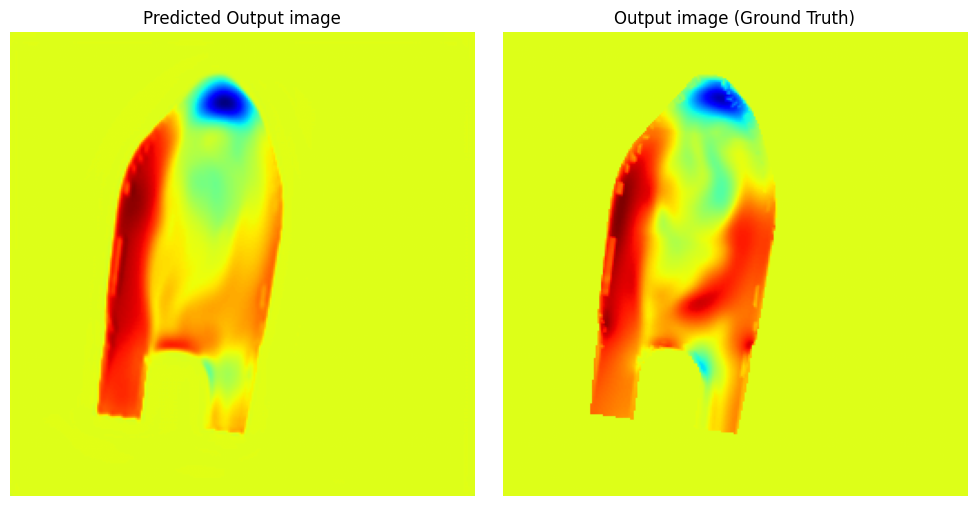

In [116]:
import numpy as np
import matplotlib.pyplot as plt

def show_pred_and_true(pred_images, true_images, i=0, cmap='jet'):
    """
    pred_images: NumPy配列 (N, H, W) など
    true_images: NumPy配列 (N, H, W) など
    i:           表示したいインデックス
    cmap:        カラーマップ ("jet", "gray", "viridis", etc.)
    """

    # i番目の画像を取り出し
    pred_img = np.squeeze(pred_images[i])  # (H, W)
    true_img = np.squeeze(true_images[i])  # (H, W)

    # カラースケールを共通にするために vmin, vmax を合わせる
    vmin = min(pred_img.min(), true_img.min())
    vmax = max(pred_img.max(), true_img.max())

    plt.figure(figsize=(10, 5))

    # 左: 予測値
    plt.subplot(1, 2, 1)
    plt.imshow(pred_img, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title("Predicted Output image")
    plt.axis("off")

    # 右: 真値
    plt.subplot(1, 2, 2)
    plt.imshow(true_img, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title("Output image (Ground Truth)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# 使用例:
show_pred_and_true(test_outputs, test_gt, i=250, cmap='jet')


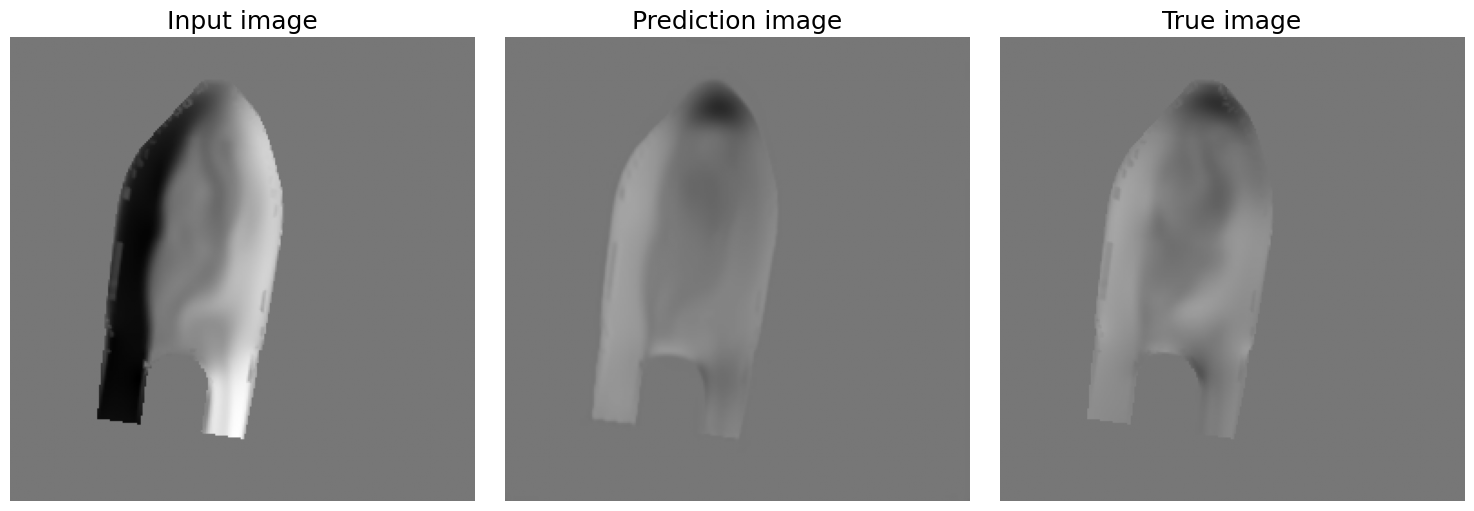

In [140]:
import numpy as np
import matplotlib.pyplot as plt

def show_input_pred_true(input_images, pred_images, true_images, i=0, cmap='jet'):
    """
    3枚の画像を横並びに比較表示する関数

    input_images: NumPy配列 (N, H, W) など, インプット画像
    pred_images:  NumPy配列 (N, H, W) など, 予測画像
    true_images:  NumPy配列 (N, H, W) など, 真値(ターゲット)
    i:            表示したいインデックス
    cmap:         カラーマップ ("jet", "gray", "viridis", etc.)
    """

    # i番目の画像を取り出し (H, W) に変形
    input_img = np.squeeze(input_images[i])  # (H, W)
    pred_img  = np.squeeze(pred_images[i])   # (H, W)
    true_img  = np.squeeze(true_images[i])   # (H, W)

    # カラースケールを共通にするために vmin, vmax を合わせる
    vmin = min(input_img.min(), pred_img.min(), true_img.min())
    vmax = max(input_img.max(), pred_img.max(), true_img.max())

    # 図全体のサイズを設定
    plt.figure(figsize=(15, 5))

    # 左: インプット画像
    plt.subplot(1, 3, 1)
    plt.imshow(input_img, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title("Input image",fontsize=18)
    plt.axis("off")

    # 中央: 予測画像
    plt.subplot(1, 3, 2)
    plt.imshow(pred_img, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title("Prediction image",fontsize=18)
    plt.axis("off")

    # 右: 真値（ターゲット）
    plt.subplot(1, 3, 3)
    plt.imshow(true_img, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title("True image",fontsize=18)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# 使用例:cmap='jet'
show_input_pred_true(test_inputs, test_outputs, test_gt, i=250, cmap='gray')


In [ ]:
datamodule.setup()
train_dataset = np.array(datamodule.train_dataset)
val_dataset = np.array(datamodule.val_dataset)
test_dataset = np.array(datamodule.test_dataset)

In [ ]:
def show_distribution(dataset):
    flatten_input_data = dataset[:, 0, ...].flatten()
    flatten_output_data = dataset[:, 1, ...].flatten()
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(flatten_input_data[flatten_input_data!=0], bins=100, alpha=0.5, label='input')
    plt.subplot(1, 2, 2)
    plt.hist(flatten_output_data[flatten_output_data!=0], bins=100, alpha=0.5, label='output')

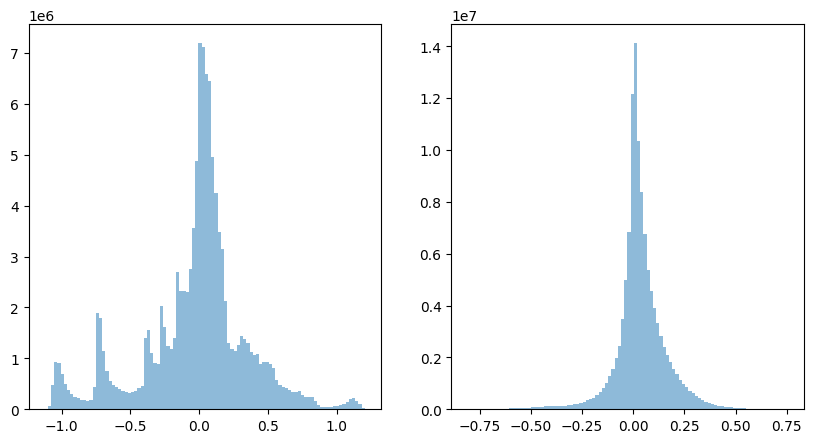

In [ ]:
show_distribution(train_dataset)

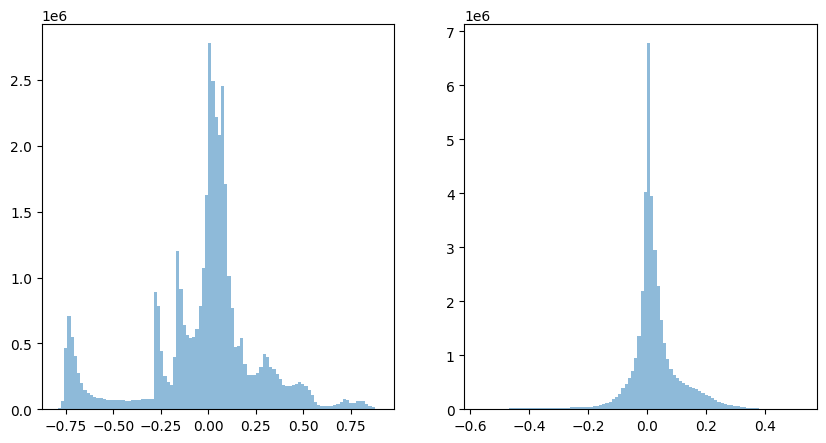

In [ ]:
show_distribution(train_dataset[:3000])

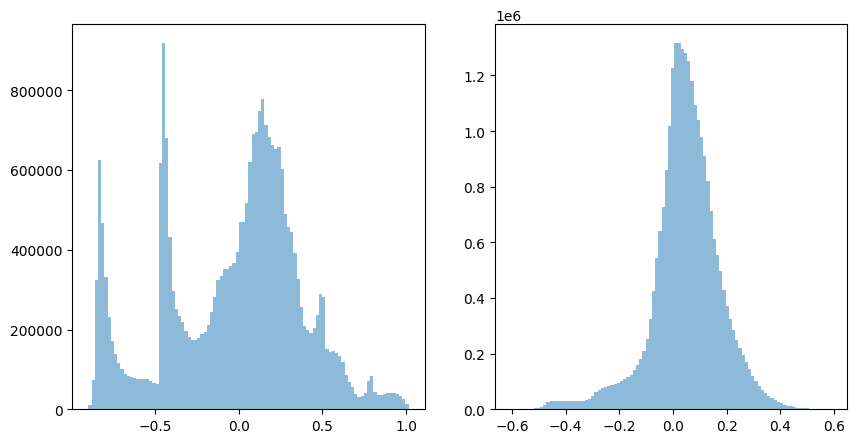

In [ ]:
show_distribution(val_dataset)

In [ ]:
a = train_dataset[:1000]
b = np.concatenate([test_dataset, a], axis=0)

In [ ]:
b

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., .

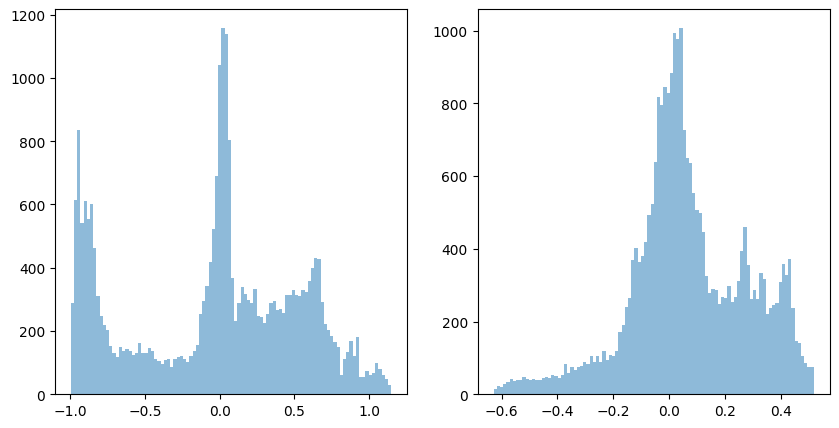

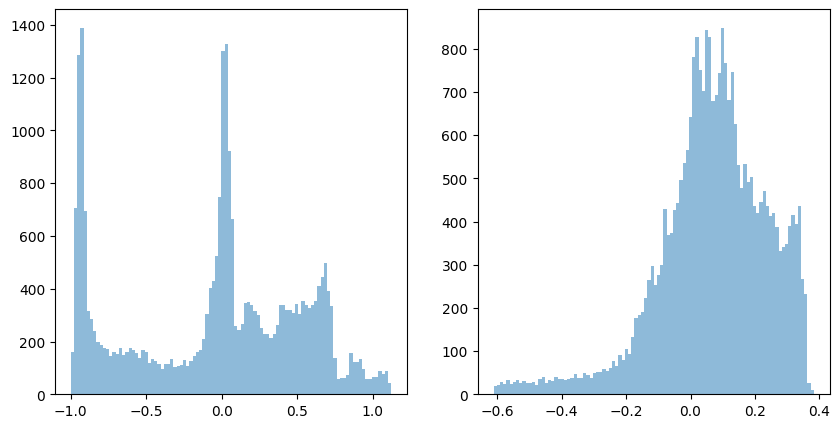

In [ ]:
show_distribution(test_dataset[:2])
show_distribution(test_dataset[3:5])

In [ ]:
train_dataset